<a href="https://colab.research.google.com/github/younhuiji/python/blob/main/py23_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mpg (Mile Per Gallon) 데이터 셋

* mpg 데이터 셋을 로드하고 탐색.
* mpg ~ displacement scatter plot
* 2x2 subplot을 생성. scatter plot.
    * mpg ~ cylinders
    * mpg ~ horsepower
    * mpg ~ weight
    * mpg ~ acceleration
* cylinders별 mpg 평균 막대 그래프
* cylinders별 mpg box plot
* origin별, cylinders별 mpg box plot
* origin별, cylinders별 mpg 평균 막대 그래프

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mpg = sns.load_dataset('mpg')

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


mpg DataFrame

* mpg: 연비.
* cylinders: 엔진의 실린더 개수.
* displacement: 배기량.
* horsepower: 마력.
* weight: 무게.
* acceleration: 가속도.
* model_year: 생산년도.
* origin: 생산지.
* name: 자동차 이름.

# 데이터 탐색

In [ ]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mpg.origin.value_counts() # 카테고리 타입 변수의 빈도수

usa       249
japan      79
europe     70
Name: origin, dtype: int64

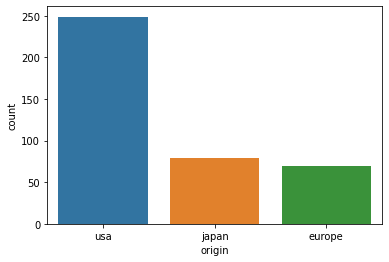

In [ ]:
sns.countplot(data=mpg, x='origin')
plt.show()

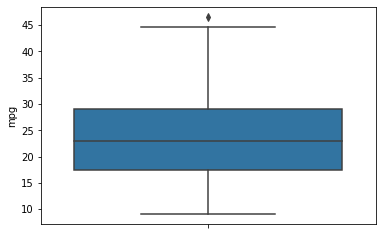

In [ ]:
# mpg 컬럼의 box plot
sns.boxplot(data=mpg, y='mpg')
plt.show()

In [ ]:
len(mpg.name.unique())

305

# 연비에 영향을 미치는 변수

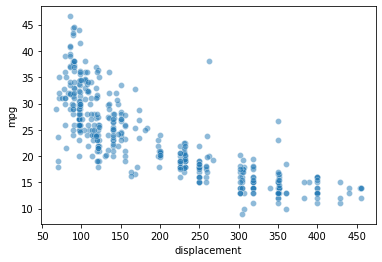

In [ ]:
# mpg ~ displacement
sns.scatterplot(data=mpg, x='displacement', y='mpg', alpha=0.5)
plt.show()

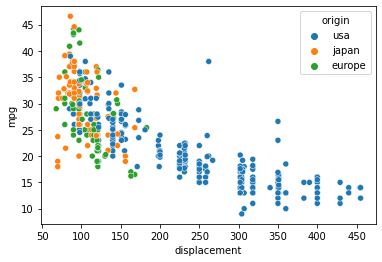

In [ ]:
# mpg~ displacement + origin(색깔)
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='origin')

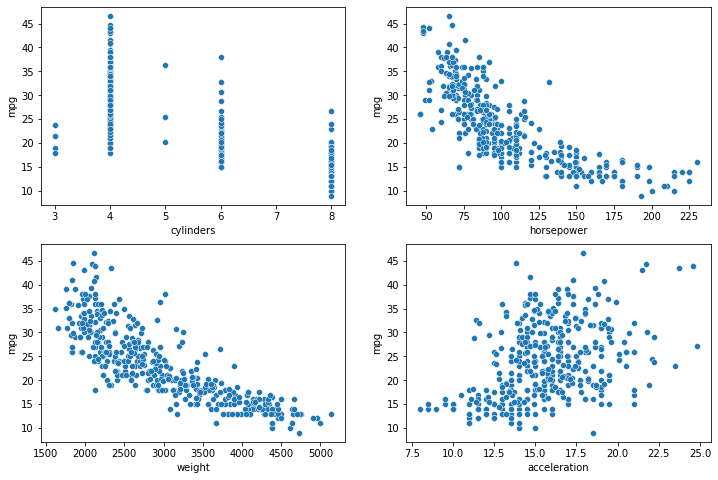

In [ ]:
# 2x2 subplot들을 생성
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# 각 subplot에 선점도 그리기
sns.scatterplot(data=mpg, x='cylinders', y='mpg',ax=ax[0,0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg',ax=ax[0,1])
sns.scatterplot(data=mpg, x='weight', y='mpg',ax=ax[1,0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg',ax=ax[1,1])

# 그래프 보여주기
plt.show()

* cylinders별 mpg 평균 막대 그래프

In [ ]:
mpg.groupby('cylinders').mpg.mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

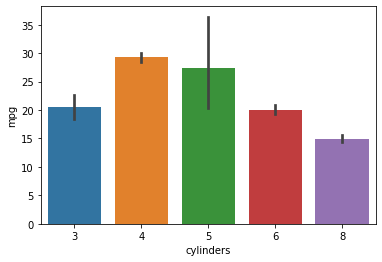

In [ ]:
sns.barplot(data=mpg, x='cylinders', y='mpg') # estimator=np.mean(기본값)
plt.show()

cylinders별 mpg box plot

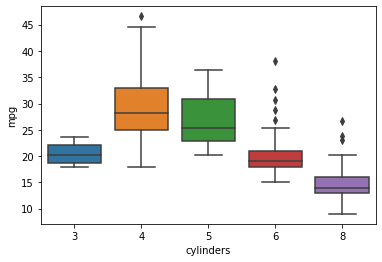

In [ ]:
sns.boxplot(data=mpg, x='cylinders', y='mpg')
plt.show()

origin별, cylinders별 mpg box plot


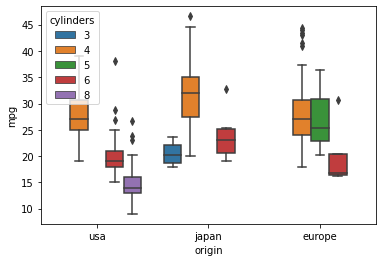

In [ ]:
sns.boxplot(data=mpg, x='origin', y='mpg', hue='cylinders')
plt.show()

origin별, cylinders별 mpg 평균 막대 그래프

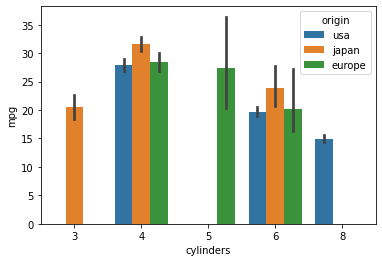

In [ ]:
sns.barplot(data=mpg, x='cylinders', y='mpg', hue='origin') 
plt.show()

In [ ]:
mpg.groupby(['origin','cylinders'])['mpg'].mean()

origin  cylinders
europe  4            28.411111
        5            27.366667
        6            20.100000
japan   3            20.550000
        4            31.595652
        6            23.883333
usa     4            27.840278
        6            19.663514
        8            14.963107
Name: mpg, dtype: float64

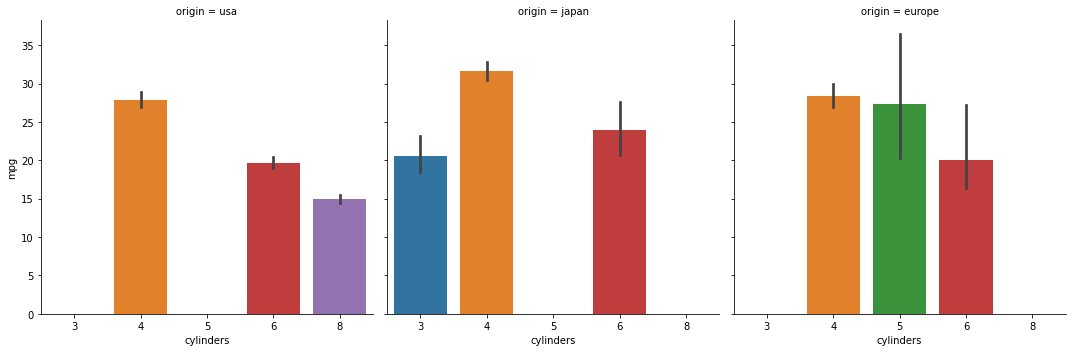

In [ ]:
sns.catplot(data=mpg, x='cylinders', y='mpg', col='origin', kind='bar')
plt.show()

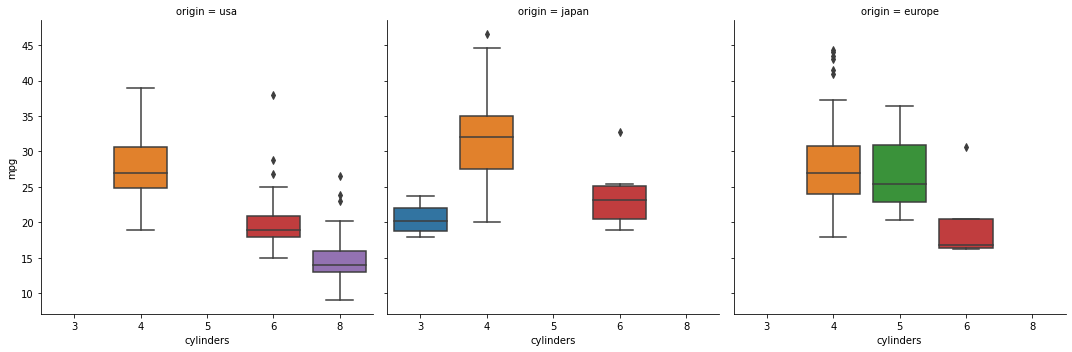

In [ ]:
sns.catplot(data=mpg, y='mpg', x='cylinders', col='origin', kind='box')
plt.show()